In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Classificazione delle recensioni di film su IMDB

Lavoreremo col dataset IMDB. Si tratta di 50.000 recensioni di film molto polarizzate, tratte dall'Internet Movie Database. Sono divise in 25.000 recensioni per l'addestramento e altre 25.000 per il test.

In [ ]:
# Caricamento dati.
# Il parametro num_words=10000 vuol dire che teniamo traccia solo delle 10.000
# parole più comuni nelle recensioni. Tutte le altre parole vengono ignorate.

imdb = tf.keras.datasets.imdb
(imdb_train_data, imdb_train_labels), (imdb_test_data, imdb_test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


## Preparazione dei dati

In [ ]:
# imdb_train_labels è un elenco di 0 ed 1, dove 0 sta per recensione positiva, 1 per negativa

imdb_train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
# imdb_train_data è un elenco di recensioni. Ogni recensione è codifica come un elenco di numeri. I numeri
# da 0 a 2 hanno un significato speciale, quelli da 3 in poi corrispondono ognuno ad una parola diversa.

imdb_train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [ ]:
# Per sapere a che parola corrisponde un certo numero, possiamo caricare un indice di corrispondenza
# tra numeri e parole.

word_index = imdb.get_word_index()

1654784/1641221 [==============================] - 0s 0us/step


In [ ]:
# word_index trasforma parole nel numero corrispondente. In realtà i numeri che
# compaiono nelle recensioni sono i numeri restituiti da word_index aumentati
# di 2 (per tenere con del fatto che i valori da 0 a 2 hanno un significato
# speciale)

word_index['dog']

909

In [ ]:
# Possiamo calcolare la trasformazione inversa come segue

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

reverse_word_index[909]

'dog'

In [ ]:
# Questo è l'elenco delle parole della prima recensione. Notare l'espressione
# i - 3 perché in realtà il numero 3 della recensione corresponde alla prima
# parola dell'indice.

' '.join([reverse_word_index.get(i - 3, '?') for i in imdb_train_data[0]])

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

Non possiamo fornire alla rete neurale come input un elenco di numeri di lunghzza variabile per ogni recensione. La dimensione dell'input dovrebbe essere sempre la stessa. Allora trasformiamo l'input da una sequenza di numeri ad un vettore di 10.000 valori binari. La posizione i-esima del vettore sarà 1 se la parola i-esima fa parte della recensione, 0 altrimenti.

In [ ]:
# Definiamo una funzione che esegue la trasformazione vista sopra. Chiamiamo l'insieme di
# dati modificato x_train (ed x_test). L'uso di questi nomi per indicare i dati di addestramento
# e di test è abbastanza comune.

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(imdb_train_data)
x_test = vectorize_sequences(imdb_test_data)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
# Per omogenità, chiamiamo le etichette di addestramento e di test con i nomi y_train e y_test

y_train = imdb_train_labels
y_test = imdb_test_labels

## Creazione e addestramento rete

In [ ]:
# Creiamo la rete. Notare che il primo strato, come nel caso di MNIST, contiene
# il parametro input_shape per specificare la dimensione della singola istanza
# di input, in questo caso un vettore di 10.000 posizioni.

imdb_network = tf.keras.models.Sequential([
   tf.keras.layers.Dense(16, activation='relu', input_shape=(10000,)),
   tf.keras.layers.Dense(16, activation='relu'),
   tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
imdb_network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
imdb_network.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
imdb_history = imdb_network.fit(x_train, y_train, epochs=20, batch_size=512)

Epoch 1/20
49/49 [==============================] - 2s 28ms/step - loss: 0.4637 - accuracy: 0.8294
Epoch 2/20
49/49 [==============================] - 1s 27ms/step - loss: 0.2700 - accuracy: 0.9080
Epoch 3/20
49/49 [==============================] - 1s 27ms/step - loss: 0.2063 - accuracy: 0.9272
Epoch 4/20
49/49 [==============================] - 1s 27ms/step - loss: 0.1718 - accuracy: 0.9403
Epoch 5/20
49/49 [==============================] - 2s 36ms/step - loss: 0.1471 - accuracy: 0.9486
Epoch 6/20
49/49 [==============================] - 2s 38ms/step - loss: 0.1271 - accuracy: 0.9574
Epoch 7/20
49/49 [==============================] - 2s 34ms/step - loss: 0.1112 - accuracy: 0.9624
Epoch 8/20
49/49 [==============================] - 2s 33ms/step - loss: 0.0973 - accuracy: 0.9687
Epoch 9/20
49/49 [==============================] - 1s 30ms/step - loss: 0.0848 - accuracy: 0.9735
Epoch 10/20
49/49 [==============================] - 2s 35ms/step - loss: 0.0738 - accuracy: 0.9762
Epoch 11/

In [ ]:
# Valutando la rete sull'insieme di test scopriamo che l'accuratezza è molto
# minore di quella che si ottiene sull'insieme di addestramento.

imdb_network.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.8141 - accuracy: 0.8511


[0.8140817880630493, 0.8510800004005432]

# Overfitting

Vogliamo capire meglio cosa succede. Per far ciò, invece di valutare come si comporta la rete sull'insieme di test, facciamolo ad ogni epoca.

**ATTENZIONE**: dal punto di vista metodologico non è la cosa corretta da fare.

In [ ]:
# Il parameto validation_data del metodo fit consente di specificare un insieme
# di dati sul quale la rete verrà valutata alla fine di ogni epoca.

imdb_network2 = tf.keras.models.Sequential([
   tf.keras.layers.Dense(16, activation='relu', input_shape=(10000,)),
   tf.keras.layers.Dense(16, activation='relu'),
   tf.keras.layers.Dense(1, activation='sigmoid')
])
imdb_network2.compile (optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
imdb_history2 = imdb_network2.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 50ms/step - loss: 0.4481 - accuracy: 0.8201 - val_loss: 0.3275 - val_accuracy: 0.8820
Epoch 2/20
49/49 [==============================] - 2s 38ms/step - loss: 0.2564 - accuracy: 0.9084 - val_loss: 0.2889 - val_accuracy: 0.8863
Epoch 3/20
49/49 [==============================] - 2s 38ms/step - loss: 0.1996 - accuracy: 0.9285 - val_loss: 0.2829 - val_accuracy: 0.8885
Epoch 4/20
49/49 [==============================] - 2s 41ms/step - loss: 0.1662 - accuracy: 0.9412 - val_loss: 0.3014 - val_accuracy: 0.8814
Epoch 5/20
49/49 [==============================] - 2s 39ms/step - loss: 0.1438 - accuracy: 0.9498 - val_loss: 0.3133 - val_accuracy: 0.8800
Epoch 6/20
49/49 [==============================] - 2s 38ms/step - loss: 0.1269 - accuracy: 0.9556 - val_loss: 0.3894 - val_accuracy: 0.8582
Epoch 7/20
49/49 [==============================] - 2s 38ms/step - loss: 0.1126 - accuracy: 0.9612 - val_loss: 0.3708 - val_accuracy: 0.8722
Epoch 8/20
49

In [ ]:
# Definiamo una funzione per visualizzare l'andamento dell'errore e dell'accuratezza sia
# per l'insieme di addestramento che per quello di validazione

def display_loss_and_accuracy_withval(history):
  history_dict = history.history

  loss_values = history_dict['loss']
  val_loss_values = history_dict['val_loss']
  acc_values = history_dict['accuracy']
  val_acc_values = history_dict['val_accuracy']
  epochs = range(1, len(loss_values) + 1)

  plt.plot(epochs, loss_values, 'bo', label='Training loss')
  plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
  plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

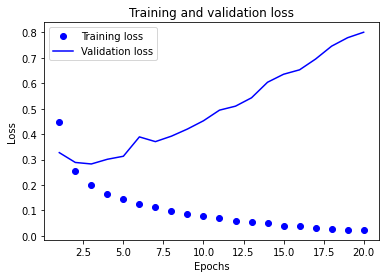

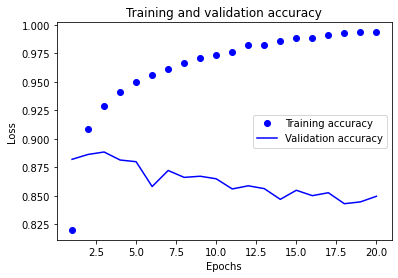

In [ ]:
display_loss_and_accuracy_withval(imdb_history2)

## Selezione del numero di epoche

Dall'analisi dei dati e dei grafici, sembra che convenga fermarsi dopo tre epoche. Tuttavia, se facciamo in questo modo, non possiamo più usare l'insieme di test per stimare l'accuratezza della rete neurale, perché lo abbiamo invece usato per trovare il numero di epoche migliori. Ci serve allora una procedura più complessa, con tre insiemi di dati:

* addestramento (per addestrare la rete neurale)
* validazione (per scegliere il valore migliore per il numero di epoche)
* test (per la stima finale dell'accuratezza)





In [ ]:
# Dividiamo l'insieme di training in un insieme di training parziale (x_partial_train) formato dalle recensioni
# dalla 10.000 in poi, e in un insieme di validazione formato dalle prime 10.000 recensioni. Stessa cosa per le
# etichette.

x_val = x_train[:10000]
x_partial_train = x_train[10000:]
y_val = y_train[:10000]
y_partial_train = y_train[10000:]

In [ ]:
# Addestriamo sull'insieme di addestramento parziale.

imdb_network3 = tf.keras.models.Sequential([
   tf.keras.layers.Dense(16, activation='relu', input_shape=(10000,)),
   tf.keras.layers.Dense(16, activation='relu'),
   tf.keras.layers.Dense(1, activation='sigmoid')
])
imdb_network3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
imdb_history3 = imdb_network3.fit(x_partial_train, y_partial_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 51ms/step - loss: 0.5146 - accuracy: 0.7887 - val_loss: 0.3881 - val_accuracy: 0.8732
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3078 - accuracy: 0.9017 - val_loss: 0.3308 - val_accuracy: 0.8702
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2255 - accuracy: 0.9262 - val_loss: 0.2797 - val_accuracy: 0.8902
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1774 - accuracy: 0.9427 - val_loss: 0.2752 - val_accuracy: 0.8883
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1441 - accuracy: 0.9545 - val_loss: 0.2830 - val_accuracy: 0.8879
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1142 - accuracy: 0.9652 - val_loss: 0.3481 - val_accuracy: 0.8661
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0931 - accuracy: 0.9734 - val_loss: 0.3092 - val_accuracy: 0.8832
Epoch 8/20
30

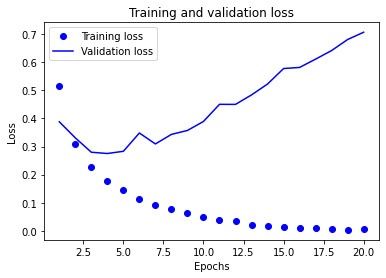

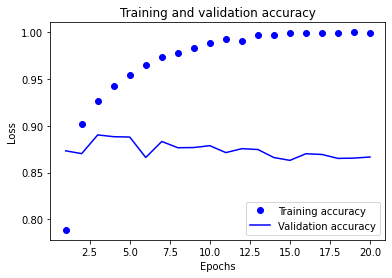

In [ ]:
display_loss_and_accuracy_withval(imdb_history3)

Una volta individuata l'epoca migliore (la numero 3), riaddestriamo la rete usando l'insieme di training completo, e valutiamo l'accuratezza sull'insieme di test.

In [ ]:
imdb_network3_full = tf.keras.models.Sequential([
   tf.keras.layers.Dense(16, activation='relu', input_shape=(10000,)),
   tf.keras.layers.Dense(16, activation='relu'),
   tf.keras.layers.Dense(1, activation='sigmoid')
])
imdb_network3_full.compile (optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
imdb_history3_full = imdb_network3_full.fit(x_train, y_train, epochs=3, batch_size=512)

Epoch 1/3
49/49 [==============================] - 2s 27ms/step - loss: 0.4543 - accuracy: 0.8213
Epoch 2/3
49/49 [==============================] - 1s 28ms/step - loss: 0.2602 - accuracy: 0.9112
Epoch 3/3
49/49 [==============================] - 1s 27ms/step - loss: 0.2008 - accuracy: 0.9305


In [ ]:
imdb_network3_full.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.2879 - accuracy: 0.8853


[0.2878996729850769, 0.8853200078010559]

Sebbene addestrata su meno epoche di quella precedente, la nuova rete ha un'accuratezza migliore.